In [1]:
# importing necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 


In [2]:
# reading the data
data = pd.read_csv('wc-at.csv')

In [3]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
# There are two columns , Waist  and AT (Adipose Tissue)
# checking null values
data.isna().sum()

Waist    0
AT       0
dtype: int64

In [5]:
# checking duplicated values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
104    False
105    False
106    False
107    False
108    False
Length: 109, dtype: bool

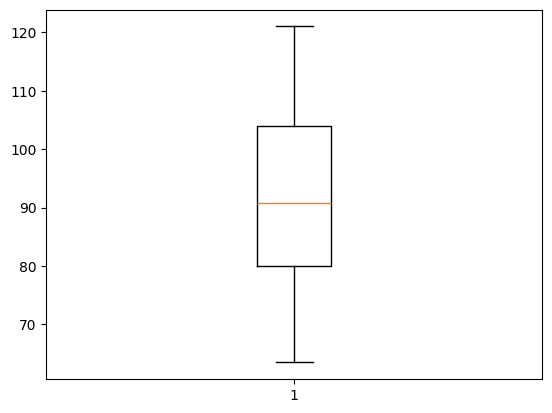

In [6]:
# boxplot for outliers
plt.boxplot(x = data.Waist)
plt.show() # there are no outliers

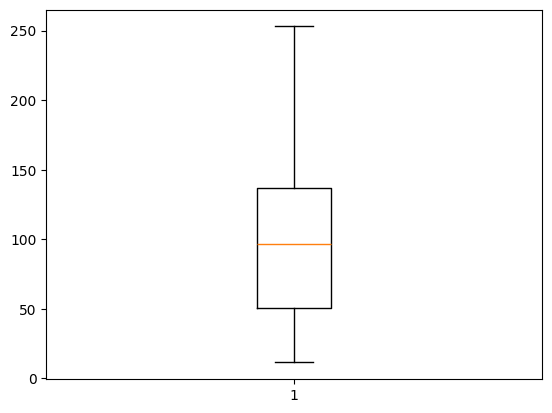

In [7]:
plt.boxplot(x = data.AT)
plt.show() # no  outliers

In [8]:
data.corr()  # correlation between the two quantities

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


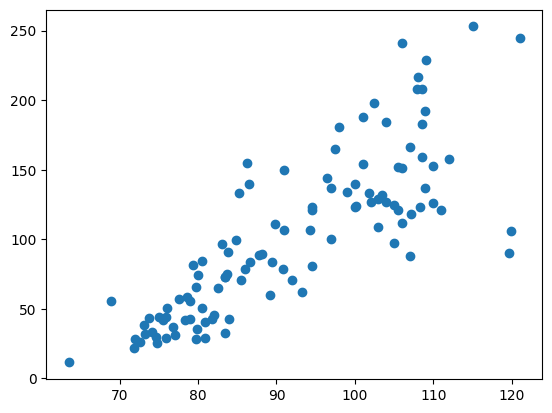

In [9]:
plt.scatter(data.Waist, data.AT)

In [10]:
# reshaping array for fitting it on model
X = data.Waist.values.reshape(-1,1)
y = data.AT.values.reshape(-1,1)
# our y (dependent variable) will be AT and the X(indepedent variable) will be Waist
# Note: We are splitting the data after reshaping because we only have one column for training.
#  If you're using multiple columns (multi-feature):
# Then no need to reshape manually — pandas DataFrame will already be in (n_samples, n_features)

<Axes: xlabel='Waist', ylabel='AT'>

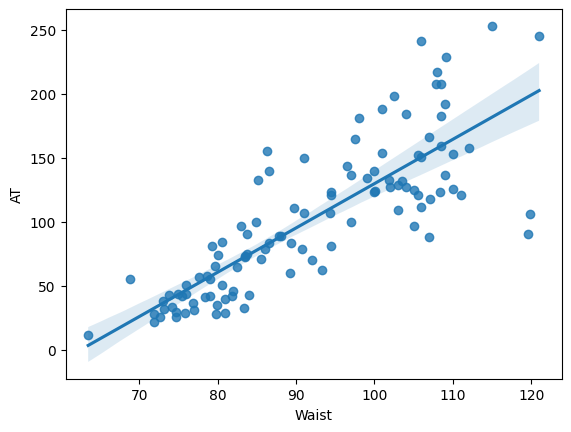

In [11]:
sns.regplot(x='Waist', y = 'AT', data = data)

In [12]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,random_state=42)

In [13]:
# checking the shape of the train and test dataset
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (98, 1)
X_test: (11, 1)
y_train: (98, 1)
y_test: (11, 1)


In [14]:
# fitting the data into the simple linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
print(lr.coef_)
print(lr.intercept_)

[[3.59666686]]
[-227.50627407]


In [16]:
y_pred = lr.predict(X_test)

In [17]:
print(f'MSE: {mean_squared_error(y_pred,y_test)}')
print(f'r2_Score: {r2_score(y_pred,y_test)}')

MSE: 2512.8812438206046
r2_Score: 0.26589342346168576
